# CEN426 - Introduction to Machine Learning
---
## Homework 01
The student must use both K-Means (ignoring the class column in the data) and K-NN on a sample dataset, and then interpret the results.

### Student ID: 2016556017
### Author: Furkan Çetinkaya \<ctnky.frkn@gmail.com\>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans                   # K-Means
from sklearn.neighbors import KNeighborsClassifier    # KNN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Read and Prepare Dataset

In [2]:
def prepare_dataset(Xt, Xp):
    Xt.Gender         = pd.Categorical(Xt.Gender)          # Make the type of spesified features categorical
    Xt.Customer_Type  = pd.Categorical(Xt.Customer_Type)
    Xt.Type_of_Travel = pd.Categorical(Xt.Type_of_Travel)
    Xt.Class          = pd.Categorical(Xt.Class)
    Xt.satisfaction   = pd.Categorical(Xt.satisfaction)
    Xp.Gender         = pd.Categorical(Xp.Gender)
    Xp.Customer_Type  = pd.Categorical(Xp.Customer_Type)
    Xp.Type_of_Travel = pd.Categorical(Xp.Type_of_Travel)
    Xp.Class          = pd.Categorical(Xp.Class)
    Xp.satisfaction   = pd.Categorical(Xp.satisfaction)
    
    Xt['Gender']         = Xt.Gender.cat.codes            # Convert categorical data into its enumerated class codes
    Xt['Customer_Type']  = Xt.Customer_Type.cat.codes
    Xt['Type_of_Travel'] = Xt.Type_of_Travel.cat.codes
    Xt['Class']          = Xt.Class.cat.codes
    Xt['satisfaction']   = Xt.satisfaction.cat.codes
    Xp['Gender']         = Xp.Gender.cat.codes
    Xp['Customer_Type']  = Xp.Customer_Type.cat.codes
    Xp['Type_of_Travel'] = Xp.Type_of_Travel.cat.codes
    Xp['Class']          = Xp.Class.cat.codes
    Xp['satisfaction']   = Xp.satisfaction.cat.codes
    
    yt = Xt['satisfaction']                  # Training label set
    yp = Xp['satisfaction']                  # Prediction label set
    Xt = Xt.drop('satisfaction', axis=1)     # Drop label from training dataset
    Xp = Xp.drop('satisfaction', axis=1)     # Drop label from prediction dataset
    
    return (Xt, yt, Xp, yp)

In [3]:
Xt = pd.read_csv("Airline_Passenger_Satisfaction/train.csv")     # Read training data
Xp = pd.read_csv("Airline_Passenger_Satisfaction/test.csv")      # Read prediction data
Xt = Xt.drop(['idx', 'id'], axis=1)        # Drop unnecessary features on training dataset
Xp = Xp.drop(['idx', 'id'], axis=1)        # Drop unnecessary features on prediction dataset
(Xt,yt, Xp, yp) = prepare_dataset(Xt, Xp)  # Preprocess dataset
Xp[Xp.isnull()] = 0        # Replace N/A in the prediction dataset with 0
Xt[Xt.isnull()] = 0        # Replace N/A in the training dataset with 0

### Reduce Dimensionality

In [4]:
pca = PCA(n_components=2)    # Principle Component Analysis
Xrt = pca.fit_transform(Xt)   # Reduced training set
Xrp = pca.fit_transform(Xp)   # Reduced prediction set

### Implement KMeans

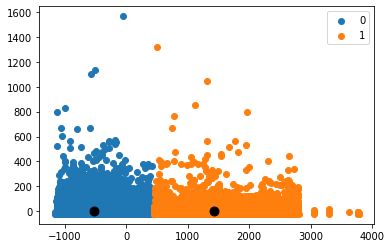

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Xrt)   # Create Model and fit with training data
yup = kmeans.predict(Xrp)                               # Predict on prediction data

label_names = np.unique(yup)             # Get unique label names
centroids = kmeans.cluster_centers_      # Get cluster centers from the model
for i in label_names:                    # Plot distribution
    plt.scatter(Xrp[yup == i , 0] , Xrp[yup == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Implement KNN

In [6]:
knn = KNeighborsClassifier(n_neighbors=6).fit(Xrt, yt)             # Create Model and fit with training data
ysp = knn.predict(Xrp)                                           # Predict on prediction data
print("KNN Accuracy:",sklearn.metrics.accuracy_score(yp, ysp))   # Calculate classification accuracy

KNN Accuracy: 0.6221512165075455


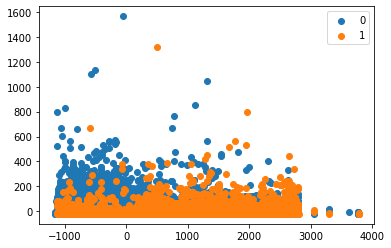

In [7]:
label_names = np.unique(ysp)                                         # Get unique labels
for i in label_names:                                                # Plot Distribution
    plt.scatter(Xrp[ysp == i , 0] , Xrp[ysp == i , 1] , label = i)
plt.legend()
plt.show()